<a href="https://colab.research.google.com/github/atalaveracuya/Forescats-con-R/blob/main/py_viviendas_alquiler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller: Predicción de precios de vivienda con Machine Learning

- 📘 Detalles del curso ["Machine Learning con Python"](https://www.labdatosperu.org/capacitaciones/machine-learning-con-python)  
- ✉️ Escribenos para solicitar [informes](https://wa.link/bqg3k7)
- 📎 Documentos [.dta](https://drive.google.com/drive/folders/1ObI0nvHeLYon7XF_syuujCofb9VpnA7A?usp=drive_link)
- 🎥 Grabación [aqui](https://us06web.zoom.us/clips/share/2G7AaADKQ8G2uWXvFQ7hWg)

# Paquetes

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Procesando archivos

In [ ]:
# Archivos ENAHO
archivos = [
    "enaho01-2024-100.dta",
    "enaho01-2023-100.dta",
    "enaho01-2022-100.dta"
]

In [ ]:
# Columnas a leer
columnas = ["p101", "p105a", "p105b", "p104", "latitud", "longitud", "ubigeo"]

| Variable name | Variable label                                                                 |
|---------------|--------------------------------------------------------------------------------|
| p101          | tipo de vivienda                                                               |
| p105a         | la vivienda que ocupa su hogar es:                                             |
| p105b         | monto mensual por alquiler o compra de la vivienda (en s/.)                    |
| p104          | ¿cuántas habitaciones en total tiene la vivienda, sin contar el baño, la cocina y la sala?|
| latitud       | latitud                                                                        |
| longitud      | longitud                                                                       |
| ubigeo        | ubicación geográfica                                                           |


In [ ]:
# Leer y unir los tres años
dfs = []
for archivo in archivos:
    df = pd.read_stata(archivo, columns=columnas)
    df["ub_prov"] = df["ubigeo"].astype(str).str[:4]
    dfs.append(df)

In [ ]:
enaho = pd.concat(dfs, ignore_index=True)
enaho = enaho[(enaho["ub_prov"] == "1501") | (enaho["ub_prov"] == "0701")]

In [ ]:
enaho.head()

,p101,p105a,p105b,p104,latitud,longitud,ubigeo,ub_prov
808,departamento en edificio,"propia, totalmente pagada",NaN,3.0,-12.068179,-77.11631,070104,0701
809,NaN,NaN,NaN,NaN,-12.068179,-77.11631,070104,0701
810,casa independiente,"propia, totalmente pagada",NaN,6.0,-12.068179,-77.11631,070104,0701
811,casa independiente,alquilada,1550.0,5.0,-12.068179,-77.11631,070104,0701
812,casa independiente,"propia, totalmente pagada",NaN,6.0,-12.068179,-77.11631,070104,0701


In [ ]:
enaho.p105a.value_counts()#.plot(kind="pie")

,count
p105a,
"propia, totalmente pagada",7246
alquilada,2068
cedida por otro hogar o institucion,2023
"propia, por invasion",721
"propia, comprandola a plazos",227
cedida por el centro de trabajo,10
otra forma,7


In [ ]:
casas_alq = enaho.query(" p105a ==  'alquilada' ").copy()

In [ ]:
casas_alq

,p101,p105a,p105b,p104,latitud,longitud,ubigeo,ub_prov
811,casa independiente,alquilada,1550.0,5.0,-12.068179,-77.116310,070104,0701
814,departamento en edificio,alquilada,1080.0,3.0,-12.068179,-77.116310,070104,0701
853,casa independiente,alquilada,280.0,4.0,-11.840870,-77.162552,070106,0701
873,casa independiente,alquilada,365.0,3.0,-11.879931,-77.128036,070106,0701
881,"vivienda en casa de vecindad (callejon, solar ...",alquilada,300.0,1.0,-12.024878,-77.096931,070101,0701
...,...,...,...,...,...,...,...,...
119033,casa independiente,alquilada,650.0,3.0,-12.201382,-76.972595,150142,1501
119045,casa independiente,alquilada,450.0,3.0,-11.820972,-77.103813,150125,1501
119055,vivienda en quinta,alquilada,180.0,1.0,-11.928683,-76.679398,150118,1501
119083,casa independiente,alquilada,150.0,2.0,-11.901286,-76.941528,150132,1501


# Análisis Exploratorio de Datos

## Rango de precios

<Axes: >

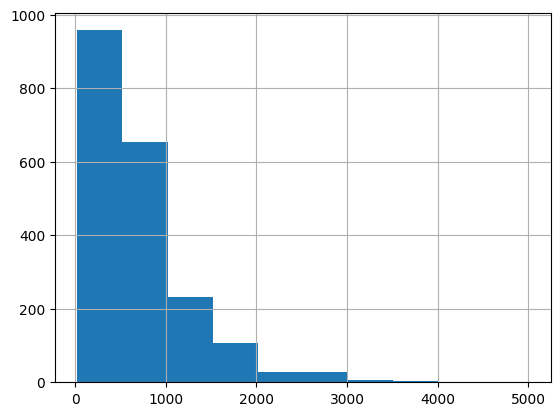

In [ ]:
casas_alq.p105b.hist()#

<Axes: >

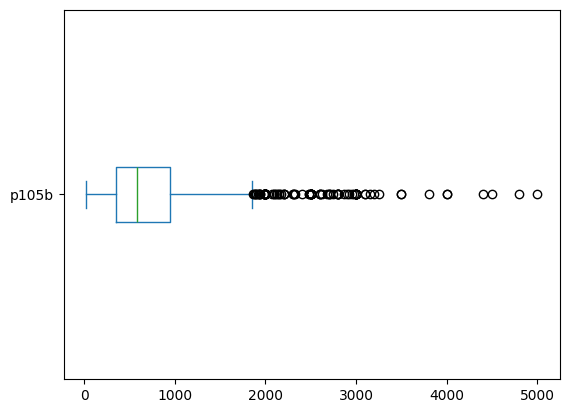

In [ ]:
casas_alq.p105b.plot.box(vert=False)

## Cantidad de habitaciones

<Axes: xlabel='p104'>

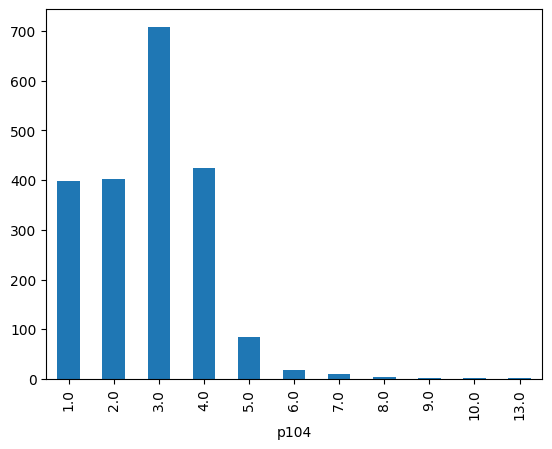

In [ ]:
casas_alq.p104.value_counts().sort_index().plot(kind="bar")

## Relacion habitaciones - Precio

<Axes: xlabel='p104', ylabel='p105b'>

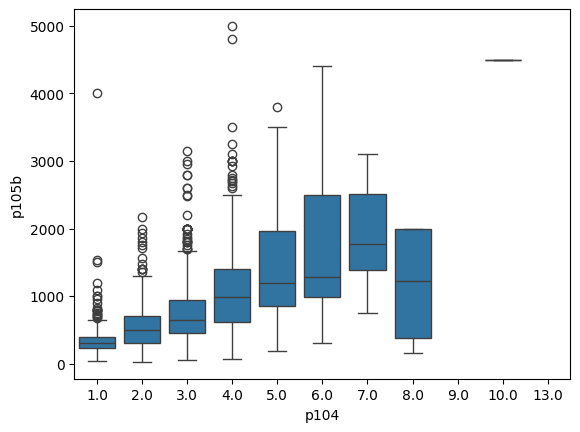

In [ ]:
sns.boxplot(x="p104", y="p105b", data=casas_alq)

## Tipo de vivienda

In [ ]:
casas_alq.p101.value_counts()#.plot(kind="pie")

,count
p101,
departamento en edificio,1068
casa independiente,789
vivienda en quinta,100
"vivienda en casa de vecindad (callejon, solar o corralon)",97
choza o cabaña,0
vivienda improvisada,0
local no destinado para habitacion humana,0


<Axes: xlabel='p105b', ylabel='p101'>

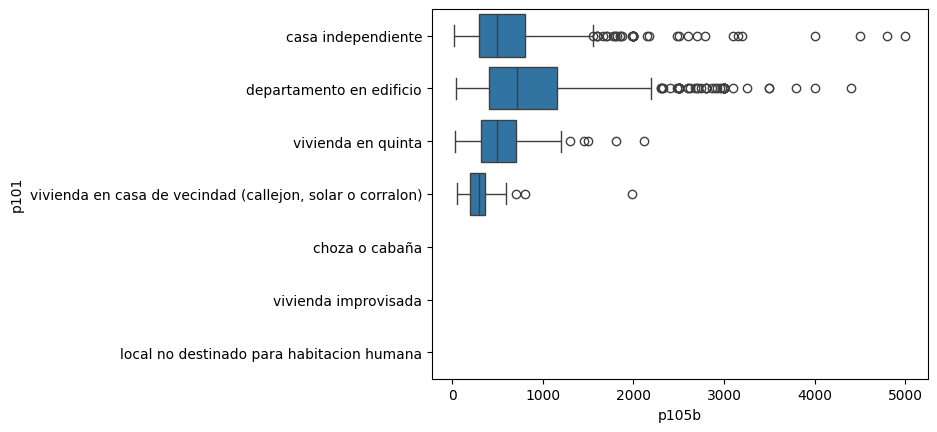

In [ ]:
sns.boxplot(x="p105b", y="p101", data=casas_alq)

## Valores Perdidos

<Axes: >

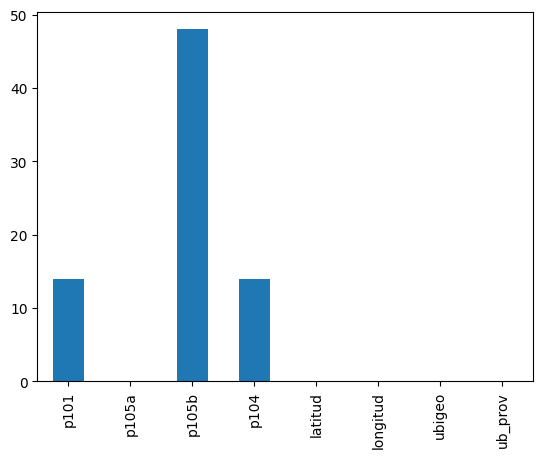

In [ ]:
casas_alq.isna().sum().plot(kind="bar")

# Limpieza y Preparación de Datos

## Eliminando vacios

In [ ]:
casas_alq.dropna(inplace=True)

In [ ]:
casas_alq.isna().sum()

,0
p101,0
p105a,0
p105b,0
p104,0
latitud,0
longitud,0
ubigeo,0
ub_prov,0


## Valores Atipicos

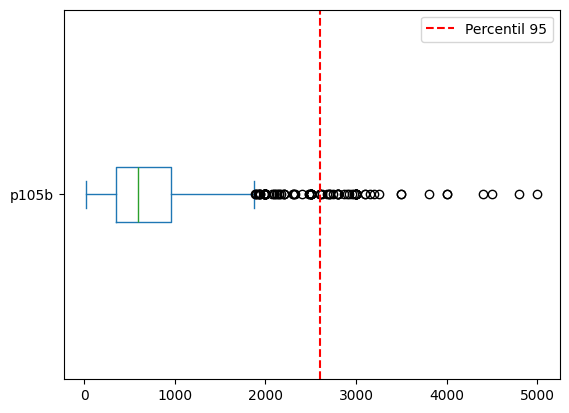

In [ ]:
casas_alq["p105b"].plot.box(vert=False)
# Calcular percentil 95
p95 = casas_alq["p105b"].quantile(0.98)
# Dibujar línea vertical
plt.axvline(p95, color="red", linestyle="--", label="Percentil 95")
plt.legend()
plt.show()

In [ ]:
casas_alq["p105b"] = casas_alq["p105b"].clip(0,p95)

<Axes: >

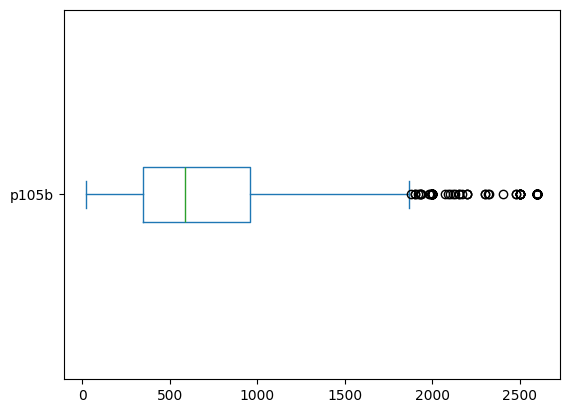

In [ ]:
casas_alq["p105b"].plot.box(vert=False)

## Creando variable dummy de departamentos

In [ ]:
casas_alq['es_departamento'] = np.where(casas_alq['p101'] == "departamento en edificio",1,0)

In [ ]:
casas_alq[['p101','es_departamento']].head(10)

,p101,es_departamento
811,casa independiente,0
814,departamento en edificio,1
853,casa independiente,0
873,casa independiente,0
881,"vivienda en casa de vecindad (callejon, solar ...",0
885,departamento en edificio,1
894,departamento en edificio,1
907,casa independiente,0
909,departamento en edificio,1
912,casa independiente,0


<Axes: xlabel='es_departamento', ylabel='p105b'>

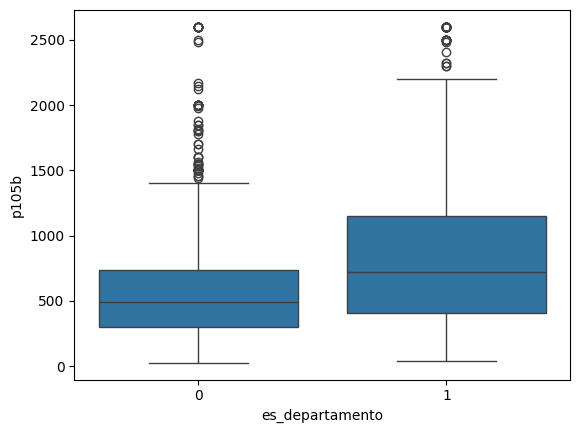

In [ ]:
sns.boxplot(y="p105b", x="es_departamento", data=casas_alq)

## Eliminando Columnas innecesarias

In [ ]:
casas_alq.head()

,p101,p105a,p105b,p104,latitud,longitud,ubigeo,ub_prov,es_departamento
811,casa independiente,alquilada,1550.0,5.0,-12.068179,-77.116310,070104,0701,0
814,departamento en edificio,alquilada,1080.0,3.0,-12.068179,-77.116310,070104,0701,1
853,casa independiente,alquilada,280.0,4.0,-11.840870,-77.162552,070106,0701,0
873,casa independiente,alquilada,365.0,3.0,-11.879931,-77.128036,070106,0701,0
881,"vivienda en casa de vecindad (callejon, solar ...",alquilada,300.0,1.0,-12.024878,-77.096931,070101,0701,0


In [ ]:
data_clean = casas_alq.drop(columns=["ubigeo", "ub_prov", "p105a", "p101"]).copy()

In [ ]:
data_clean

,p105b,p104,latitud,longitud,es_departamento
811,1550.0,5.0,-12.068179,-77.116310,0
814,1080.0,3.0,-12.068179,-77.116310,1
853,280.0,4.0,-11.840870,-77.162552,0
873,365.0,3.0,-11.879931,-77.128036,0
881,300.0,1.0,-12.024878,-77.096931,0
...,...,...,...,...,...
119033,650.0,3.0,-12.201382,-76.972595,0
119045,450.0,3.0,-11.820972,-77.103813,0
119055,180.0,1.0,-11.928683,-76.679398,0
119083,150.0,2.0,-11.901286,-76.941528,0


<Axes: xlabel='longitud', ylabel='latitud'>

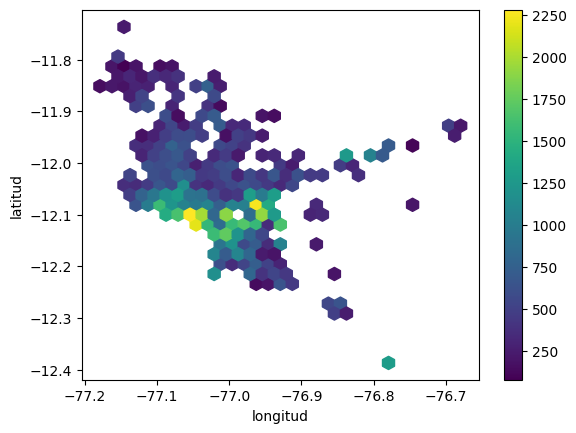

In [ ]:
data_clean.plot.hexbin(
    x="longitud",
    y="latitud",
    C="p105b",                    # valor a agregar
    reduce_C_function=np.mean,    # promedio por hexágono
    gridsize=30,
    cmap="viridis",
    mincnt=1
)

## Renombrando variables

In [ ]:
nombres = {'p105b':'precio','p104':'n_hab'}

In [ ]:
data_clean.rename(columns=nombres, inplace=True)
data_clean.head()

,precio,n_hab,latitud,longitud,es_departamento
811,1550.0,5.0,-12.068179,-77.116310,0
814,1080.0,3.0,-12.068179,-77.116310,1
853,280.0,4.0,-11.840870,-77.162552,0
873,365.0,3.0,-11.879931,-77.128036,0
881,300.0,1.0,-12.024878,-77.096931,0


# Modelo Espacial

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

## Seleccion de variables

In [ ]:
target = "precio"
feat_spatial = ["latitud", "longitud"]

In [ ]:
X = data_clean[feat_spatial]
y = data_clean[target]

## Particion de los datos

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

idx_train, idx_test = X_train.index, X_test.index  # para repetir el mismo split

## Entrenamiento

In [ ]:
# Modelo XGBoost simple
m_spatial = XGBRegressor(
    n_estimators=200,       # número de árboles
    learning_rate=0.1,      # qué tan rápido aprende el modelo
    max_depth=4,            # profundidad de los árboles (complejidad)
    objective="reg:squarederror",
    random_state=42
)

In [ ]:
# Entrenar el modelo
m_spatial.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

## Evaluación de error

In [ ]:
def evaluar(y_true, y_pred, nombre="Modelo"):
    mae  = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred)**0.5
    r2   = r2_score(y_true, y_pred)
    print(f"\n== Métricas | {nombre} ==")
    print(f"MAE : {mae:,.2f}")
    print(f"RMSE: {rmse:,.2f}")
    print(f"R²  : {r2:,.4f}")
    return mae, rmse, r2

In [ ]:
# Predicciones + métricas
y_pred_test_spatial = m_spatial.predict(X_test)
mae_s, rmse_s, r2_s = evaluar(y_test, y_pred_test_spatial, "XGBoost - Espacial (coords)")


== Métricas | XGBoost - Espacial (coords) ==
MAE : 270.23
RMSE: 371.42
R²  : 0.5054


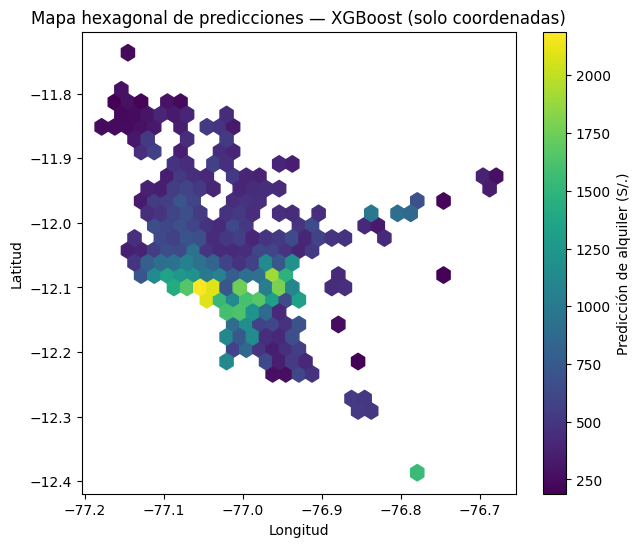

In [ ]:
# Hexmap de predicciones (modelo espacial)
y_pred_all_spatial = m_spatial.predict(data_clean[feat_spatial])

plt.figure(figsize=(7,6))
hb = plt.hexbin(
    data_clean["longitud"], data_clean["latitud"],
    C=y_pred_all_spatial,
    gridsize=30,
    reduce_C_function=np.mean,
    cmap="viridis",
    mincnt=1
)
cb = plt.colorbar(hb)
cb.set_label("Predicción de alquiler (S/.)")
plt.title("Mapa hexagonal de predicciones — XGBoost (solo coordenadas)")
plt.xlabel("Longitud"); plt.ylabel("Latitud")
plt.show()

# Modelo Final

## Seleccion de variables

In [ ]:
feat_full = ["latitud", "longitud", "n_hab", "es_departamento"]

X2 = data_clean[feat_full]
y2 = data_clean[target]

## Particion de los datos

In [ ]:
# Usar el mismo split para comparación justa
X2_train, X2_test = X2.loc[idx_train], X2.loc[idx_test]
y2_train, y2_test = y2.loc[idx_train], y2.loc[idx_test]

## Entrenamiento

In [ ]:
m_full = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=4,
    objective="reg:squarederror",
    random_state=42
)
m_full.fit(X2_train, y2_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

## Evaluación de error

In [ ]:
y_pred_test_full = m_full.predict(X2_test)
mae_f, rmse_f, r2_f = evaluar(y2_test, y_pred_test_full, "XGBoost - Final (coords + n_hab + es_dep)")


== Métricas | XGBoost - Final (coords + n_hab + es_dep) ==
MAE : 227.92
RMSE: 327.14
R²  : 0.6163


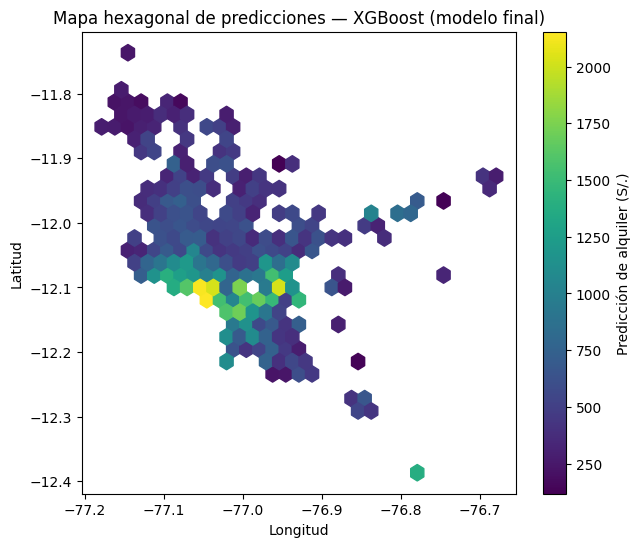

In [ ]:
# Hexmap de predicciones (modelo final)
y_pred_all_full = m_full.predict(data_clean[feat_full])

plt.figure(figsize=(7,6))
hb = plt.hexbin(
    data_clean["longitud"], data_clean["latitud"],
    C=y_pred_all_full,
    gridsize=30,
    reduce_C_function=np.mean,
    cmap="viridis",
    mincnt=1
)
cb = plt.colorbar(hb)
cb.set_label("Predicción de alquiler (S/.)")
plt.title("Mapa hexagonal de predicciones — XGBoost (modelo final)")
plt.xlabel("Longitud"); plt.ylabel("Latitud")
plt.show()


# Comparacion Final

In [ ]:
resumen = pd.DataFrame({
    "Modelo": ["Espacial (coords)", "Final (coords + p104 + es_dep)"],
    "MAE": [mae_s, mae_f],
    "RMSE": [rmse_s, rmse_f],
    "R2": [r2_s, r2_f]
})
print("\n== Resumen comparativo ==")
print(resumen.to_string(index=False))


== Resumen comparativo ==
                        Modelo        MAE       RMSE       R2
             Espacial (coords) 270.228808 371.424579 0.505407
Final (coords + p104 + es_dep) 227.924094 327.141729 0.616311


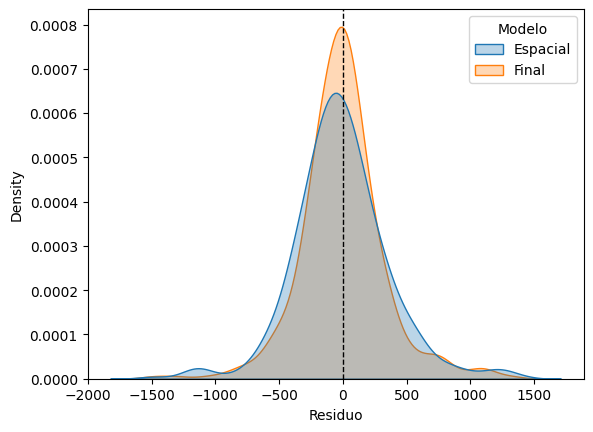

In [ ]:
res_spatial = y_test - y_pred_test_spatial
res_final   = y2_test - y_pred_test_full

res_df = pd.DataFrame({
    "Residuo": np.r_[res_spatial, res_final],
    "Modelo": (["Espacial"] * len(res_spatial)) + (["Final"] * len(res_final))
})

sns.kdeplot(data=res_df, x="Residuo", hue="Modelo", fill=True, alpha=0.3)
plt.axvline(0, color="k", linestyle="--", linewidth=1)
plt.show()

# ¿Como obtener predicciones?

In [ ]:
# Definir valores
latitud, longitud = -12.118016076413603, -77.02358030442396
n_hab = 3
es_departamento = 1  # 1 = sí, 0 = no

# Crear diccionario
registro = {
    "latitud": latitud,
    "longitud": longitud,
    "n_hab": n_hab,
    "es_departamento": es_departamento
}

# Convertir a DataFrame y predecir con el modelo completo
X_new = pd.DataFrame([registro])
precio_estimado = m_full.predict(X_new)[0]

print(f"Precio estimado: S/. {precio_estimado:,.0f}")

Precio estimado: S/. 1,359


---

## 🙌 Gracias por participar

Espero que este taller te haya ayudado a dar tus primeros pasos en el análisis espacial y el uso de **XGBoost** para predicción.  
Si quieres seguir aprendiendo, te invito a revisar los siguientes enlaces:

- 📘 Detalles del curso ["Machine Learning con Python"](https://www.labdatosperu.org/capacitaciones/machine-learning-con-python)  
- ✉️ Escribenos para solicitar [informes](https://wa.link/bqg3k7)
- 📎 Documentos [.dta](https://drive.google.com/drive/folders/1ObI0nvHeLYon7XF_syuujCofb9VpnA7A?usp=drive_link)
- 🎥 Grabación [aqui](https://us06web.zoom.us/clips/share/2G7AaADKQ8G2uWXvFQ7hWg)

¡Nos vemos en la próxima sesión!
